# 10. Sistemas de EDOs: autovalores e autovetores

## 10.1. Introdução

Em muitas áreas existem problemas que envolvem diversos componentes relacionados de alguma forma. Por exemplo, os circuitos elétricos têm esta característica, assim como alguns problemas em mecânica e em outras áreas ([Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/28/2)). Nestes e em casos semelhantes, existem duas (ou mais) variáveis dependentes e o problema matemático correspondente consiste em um sistema de duas (ou mais) equações diferenciais que sempre podem ser escritas como um sistema de equações de primeira ordem. 



<img src="imagens/aplicacoes_sistemas.png" width="1000">

<center> Figura 1: Exemplo de aplicações </center>

Sistemas de n equações lineares de primeira ordem têm a forma 
$$
\begin{gathered}
x_1^{\prime}=p_{11}(t) x_1+\cdots+p_{1 n}(t) x_n+g_1(t), \\
\vdots \\
x_n^{\prime}=p_{n 1}(t) x_1+\cdots+p_{n n}(t) x_n+g_n(t)
\end{gathered}
$$

e podem ser representados com notação matricial com a forma
$$
\mathbf{x}^{\prime}=\mathbf{P}(t) \mathbf{x}+\mathbf{g}(t)
$$

em que $x_1 = x_1(t)$, ..., $x_n = x_n(t)$ são componentes de um vetor $\mathbf{x} = \mathbf{x}(t)$. Analogamente, $g_1(t)$, ..., $g_n(t)$ são componentes de um vetor $\mathbf{g}(t)$ e $p_{11}(t)$, ..., $p_{nn}(t)$ são elementos de uma matriz $n \times n$ denotada por $\mathbf{P}(t)$. 

Um vetor $\mathbf{x} = \mathbf{x}(t)$ é uma solução do sistema se satisfizer a equação matricial (equações do sistema). Além disso, se $\mathbf{x}^{(1)}$ e  $\mathbf{x}^{(2)}$ forem soluções do sistema, então a combinação linear $c_1 \mathbf{x}^{(1)}+c_2 \mathbf{x}^{(2)}$ também será solução, quaisquer que sejam as constantes $c_1$ e $c_2$.

Se $\mathbf{g}(t) = \mathbf{0}$, então, o sistema é dito homogêneo.

**Exemplo 1:** Verificar que 

$$\mathbf{x}^{(1)}(t)=\binom{e^{3 t}}{2 e^{3 t}}=\binom{1}{2} e^{3 t}, \quad \mathbf{x}^{(2)}(t)=\binom{e^{-t}}{-2 e^{-t}}=\binom{1}{-2} e^{-t}$$

satisfazem a equação

$$\mathbf{x}^{\prime}=\left(\begin{array}{ll}1 & 1 \\ 4 & 1\end{array}\right) \mathbf{x} \text{.}$$

Em caso afirmativo para ambas, verifique que $c_1 \mathbf{x}^{(1)}+c_2 \mathbf{x}^{(2)}$ tamém satisfaz.

*Solução:* Vamos usar `SymPy`para este exemplo.

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
from sympy import Matrix

In [3]:
t, c1, c2 = sp.symbols('t C_1 C_2')
x1 = Matrix([1,2])*sp.exp(3*t)
x2 = Matrix([1,-2])*sp.exp(-t)
A = Matrix([[1,1],[4,1]])

In [4]:
x1.diff(t) == A@x1

True

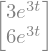

In [5]:
x1.diff(t)

In [6]:
x2.diff(t) == A@x2

True

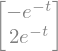

In [7]:
x2.diff(t)

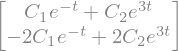

In [8]:
sol = c1*x2+c2*x1
display(sol)

In [9]:
A@sol==sol.diff(t)

True

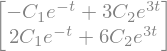

In [10]:
sol.diff(t)

### Escrevendo uma ou mais EDOs de ordem maior em um sistema de 1ª ordem

Uma equação diferencial de ordem $n$,
$$
x^{(n)}=f\left(t, x, x^{\prime}, x^{\prime \prime}, \ldots, x^{(n-1)}\right),
$$
pode ser escrito de forma equivalente como um sistema equações diferenciais de primeira ordem.


Para isso, basta definir $x_1, x_2, \ldots, x_n$ da seguinte forma:
$$
x_1=x, \quad x_2=x^{\prime}, \quad x_3=x^{\prime \prime} \quad \text { e } \quad x_n=x^{(n-1)} .
$$

Assim, obtemos o sistema
$$
\begin{cases}x_1^{\prime} & =x_2, \\ x_2^{\prime} & =x_3, \\ & \vdots \\ x_{n-1}^{\prime} & =x_n, \\ x_n^{\prime} & =f\left(t, x_1, x_2, \ldots, x_n\right) .\end{cases}
$$

**Exemplo 1:** [(Fonte)](https://www.ime.unicamp.br/~valle/Teaching/2016/MA311/Aula14.pdf) 

(a) Escreva a equação
$$
x'''+3 x^{\prime \prime}+2 x^{\prime}-5 x=\operatorname{sen}(2 t),
$$
como um sistema de equações diferenciais de primeira ordem.

*Resposta*: O sistema equivalente é
$$
\left\{\begin{array}{l}
x_1^{\prime}=x_2, \\
x_2^{\prime}=x_3, \\
x_3^{\prime}=5 x_1-2 x_2-3 x_3+\operatorname{sen}(2 t) .
\end{array}\right.
$$

(b) Escreva o sistema
$$
\begin{cases}2 x^{\prime \prime} & =-6 x+2 y \\ y^{\prime \prime} & =2 x-2 y+40 \operatorname{sen}(3 t),\end{cases}
$$
como um sistema de equações diferenciais de primeira ordem.

*Resposta*: O sistema equivalente é
$$
\begin{cases}x_1^{\prime} & =x_2 \\ x_2^{\prime} & =-3 x_1+x_3 \\ x_3^{\prime} & =x_4 \\ x_4^{\prime} & =2 x_1-2 x_3+40 \operatorname{sen}(3 t) .\end{cases}
$$

**Exemplo 2:** O movimento de um pêndulo não-amortecido é descrito pela equação $y'' = -sen(y)$. Podemos reduzir a equação acima a um par de equações ordinárias fazendo $y_1 = y$ e $y_2 = y'$. Deste modo a equação se torna 
$$
\begin{cases}
y_1' = y_2 \\
y_2' = -sen(y_1)
\end{cases}
$$

Nem sempre é possível obter uma solução da equação diferencial em termos de funções simples, no entanto o comportamento das soluções pode ser estudade por meio de recursos numéricos gráficos. 
Vamos estudar o campo de vetores associado a esse sistema de equações.

Uma forma de estudar as soluções desse sistema é construir o campo de vetores associado a esse sistema. Podemos fazer isso como é mostrado a seguir:

In [11]:
import numpy as np
import matplotlib.pyplot as plt

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22888/1687046438.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Campo de vetores de $\\frac{d^2y}{dt^2}=-\sin(y)$')


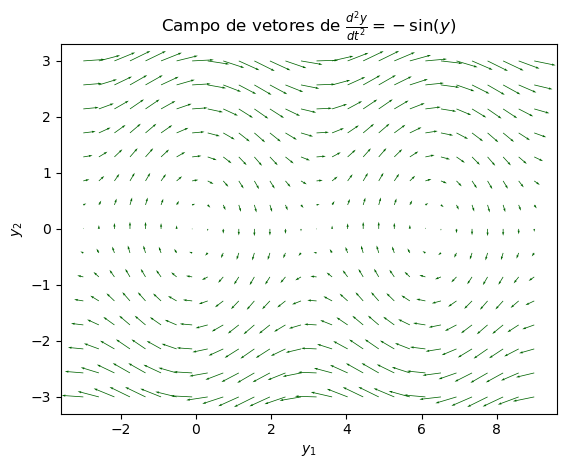

In [12]:
# coordenadas dos pontos a serem plotados
y1 = np.linspace(-3, 9, 30)
y2 = np.linspace(-3, 3, 15)

# definindo uma malha de pontos com essas coordenadas
y1_malha, y2_malha = np.meshgrid(y1, y2)    

g = lambda y1, y2: [y2, -np.sin(y1)]

v1, v2 = g(y1_malha, y2_malha)


plt.quiver(y1, y2, v1, v2, color='darkgreen', width=0.0015, angles='xy')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Campo de vetores de $\\frac{d^2y}{dt^2}=-\sin(y)$')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22888/2774556801.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Linhas de fluxo para $\\frac{d^2y}{dt^2}=-\sin(y)$')


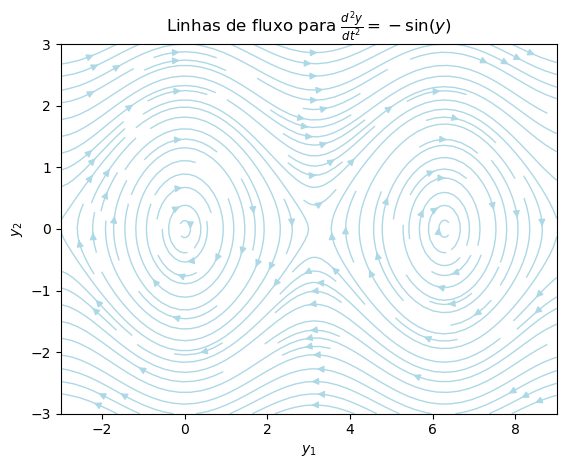

In [13]:
plt.streamplot(y1, y2, v1, v2, color='lightblue', density=1.5, linewidth=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Linhas de fluxo para $\\frac{d^2y}{dt^2}=-\sin(y)$')
plt.show()

Definindo algumas condições iniciais, é possível descrever as trajetórias das coorenadas $(y_1, y_2)$ ao londo de $t$.

In [14]:
# y é um vetor 2d
def F(y, t):
    y1, y2 = y
    return y2, -np.sin(y1)

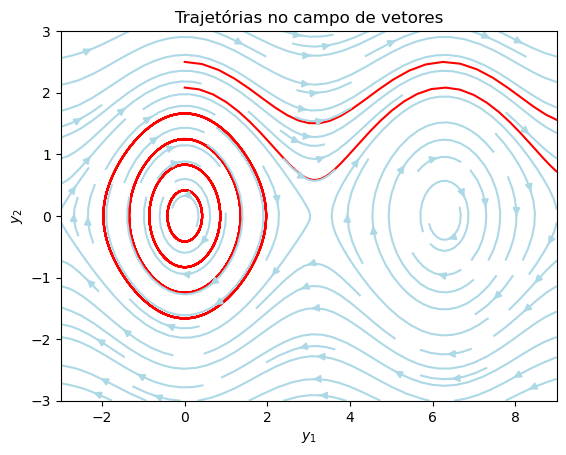

In [15]:
# resolvemos o PVI associado para cada valor inicial diferente (dado por y0)
from scipy.integrate import odeint

for y1_inic in np.linspace(0, 2.5, 7):
    tspan = np.linspace(0, 50, 300)
    y0 = [0, y1_inic]              # definindo o valor inicial da trajetória
    ys = odeint(F, y0, tspan)           # resolvendo o sistema
    plt.plot(ys[:, 0], ys[:, 1], 'r-')    # plotando a trajeória da solução

# campo de vetores anterior
plt.streamplot(y1, y2, v1, v2, color='lightblue')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim((y1[0], y1[-1]))
plt.ylim((y2[0], y2[-1]))
plt.title('Trajetórias no campo de vetores')
plt.show()

## Sistemas autônomos de duas EDOs

Frequentemente é útil encontramos as soluções de equilíbrio, ou pontos críticos, de sistemas autônomos. Fazemos isto igualando $dx/dt$ a zero. Dessa forma, obtemos o sistema linear algébrico

$$
\mathbf{A x}=-\mathbf{b}
$$

Se a matriz de coeficientes $\mathbf{A}$ tem inversa, então o sistema tem uma única solução, o único ponto crítico do sistema. No entanto, se $\mathbf{A}$ é singular, então o sistema não tem solução ou tem uma infinidade de soluções.

O comportamento das trajetórias na vizinhança de pontos críticos pode ser determinado por métodos algébricos, assim, podem-se obter muitas informações sobre as soluções de sistemas autônomos sem ter que resolver o sistema.


Sistemas de equações lineares de 1ª ordem podem ser solucionados usando autovalores e autovetores.

**Exemplo 3:** (Adaptado de [BRANNAN e BOYCE, 2008, p.127](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/148))

Considere os dois tanques interligados, conforme a figura abaixo, contendo em $t=0$ as quantidades de sal $Q_1(0)=55$ e $Q_2(0)=26$ ($t$ em minutos, $Q_1$ e $Q_2$ em onças). A variação de sal em cada tanque é devida, completamente, ao fluxo que entra e sai do tanque, de modo que podemos aplicar o princípio de balanceamento a cada tanque:

*taxa de variação do sal em um tanque = taxa de entrada de sal - taxa de saída de sal*

obtendo assim as equações diferenciais.

$$ \frac{dQ_1}{dt}=-0,1 Q_1 + 0,075 Q_2 + 1,5$$

$$ \frac{dQ_2}{dt}=0,1 Q_1 + 0,2 Q_2 + 3$$


O par de equações diferenciais acima, junto com as condições iniciais, constituem um modelo matemático do fluxo entre os dois tanques. Se pudermos resolver estas equações para $Q_1(t)$ e $Q_2(t)$, seremos capazes de prever quanto sal estará em cada tanque em qualquer tempo futuro.

<img src="imagens/galoes.png" width="480">

*(Um galão americano corresponde a cerca de 3,785 litros; uma onça corresponde a cerca de 28,349 gramas. Abreviaremos galão por gal e onças por oz)*

Em notação matricial:

$$
\begin{pmatrix}dQ_1/dt\\ dQ_2/dt \end{pmatrix} =
\begin{pmatrix} -0,1 & 0,075 \\ 0,1 & -0,2 \end{pmatrix}
{Q_1 \choose Q_2} + 
{1,5 \choose 3}.
$$

Definindo as matrizes 

$$\textbf{Q}={Q_1\choose Q_2,}, \quad \textbf{K}=\begin{pmatrix} -0,1 & 0,075 \\ 0,1 & -0,2 \end{pmatrix},\quad \textbf{b} = {1,5\choose 3},$$ 

ou

$$\frac{d\textbf{Q}}{dt} = \textbf{KQ} + \textbf{b}$$



As variáveis $Q_1$ e $Q_2$ são chamadas de variáveis de estado, já que seu valor em qualquer instante $t$ descreve o estado do sistema, isto é, neste caso, a quantidade de sal em cada tanque. Da mesma forma, o vetor $\textbf{Q} =Q_1 \textbf{i} + Q_2 \textbf{j}$ é chamado de vetor de estado do sistema. O plano $Q_1Q_2$ é denominado o **plano de estados**, ou de maneira mais corriqueira, o **plano de fase**. À medida que o tempo corre, a ponta do vetor Q descreve uma curva no plano de fase. Esta curva é chamada de **trajetória** ou **órbita**, e descreve graficamente a variação do estado ou a evolução do sistema.

Existem três tipos de gráficos que podem ser muito úteis para a visualização do comportamento de soluções de um sistema de duas equações diferenciais de 1ª ordem. Um é um campo de direções no plano $Q_1Q_2$, que pode ser desenhado escolhendo um ponto $\textbf{Q}=(Q_1,Q_2)$ e calculando a expressão à direita do sinal de igualdade, a saber, $\textbf{KQ} + \textbf{b}$, naquele ponto. O resultado é o vetor $d\textbf{Q}/dt$ no ponto dado. Este vetor é tangente à trajetória que contém o ponto ($Q_1$,$Q_2$). Desenhando este vetor como uma seta começando no ponto dado, somos capazes de mostrar a direção e o sentido da solução contendo o ponto. Repetindo este cálculo em muitos pontos, obtemos o gráfico


In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
x,y = np.meshgrid(np.linspace(0,50,26),
                  np.linspace(0,50,26))

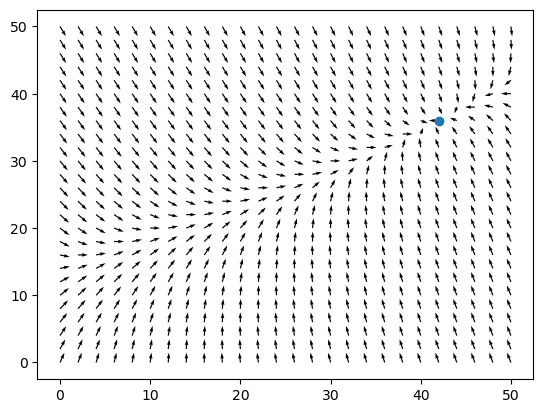

In [18]:
u = -0.1*x+0.075*y+1.5
v =  0.1*x-0.2*y+3

# normalizando as setas
u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);

plt.quiver(x, y, u, v)
plt.plot(42,36,'o')
plt.show()

Encontrando uma solução particular  com `sympy`

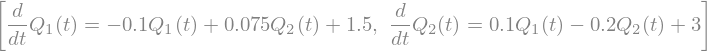

In [19]:
import sympy as sp
sp.init_printing()

t = sp.symbols('t')
Q1 = sp.Function('Q1')
Q2 = sp.Function('Q2')
eqs = [sp.Eq(sp.Derivative(Q1(t), t), -0.1*Q1(t) + 0.075*Q2(t) + 1.5),
       sp.Eq(sp.Derivative(Q2(t), t),  0.1*Q1(t) - 0.2*Q2(t) + 3)]
eqs

In [20]:
sol = sp.dsolve(eqs,[Q1(t), Q2(t)], ics={Q1(0): 55, Q2(0): 26})
sol

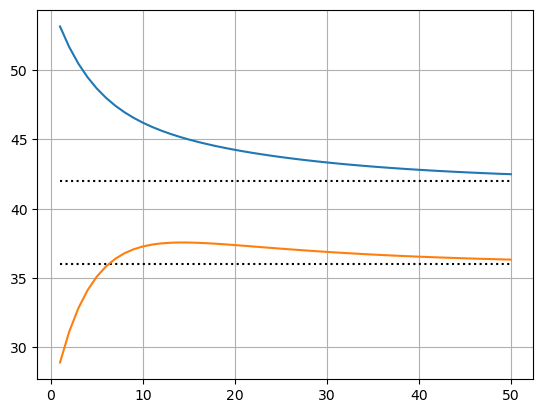

In [21]:
ti = np.linspace(1,50) 

q1 = sp.lambdify(t, sol[0].rhs)
q2 = sp.lambdify(t, sol[1].rhs)

plt.hlines((42,36), ti[0], ti[-1], colors='black', linestyles=':',)
plt.plot(ti, q1(ti), ti, q2(ti))
plt.grid()

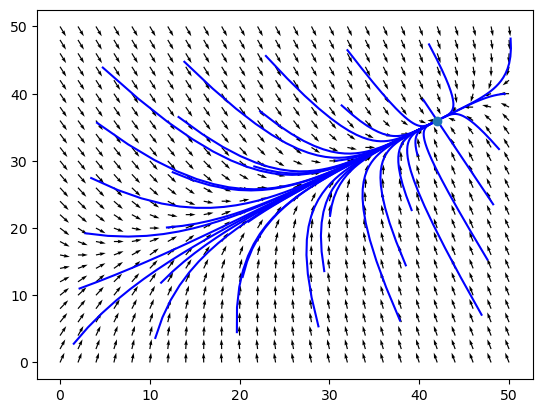

In [22]:
for v1 in np.linspace(0, 50, 6):
    for v2 in np.linspace(0, 50, 6):
        sol1, sol2 = sp.dsolve(eqs, [Q1(t), Q2(t)], ics={Q1(0): v1, Q2(0): v2})
        q1 = sp.lambdify(t, sol1.rhs)
        q2 = sp.lambdify(t, sol2.rhs)
        plt.plot(q1(ti), q2(ti), 'b-')
        
plt.quiver(x, y, u, v)
plt.plot(42,36,'o')
plt.show()

Podemos encontrar o ponto crítico desse sistema resolvendo o sistema linear


$$
\left(\begin{array}{rr}
-0,1 & 0,075 \\
0,1 & -0,2
\end{array}\right)\binom{Q_1}{Q_2}=-\binom{1,5}{3}
$$

que fornece
$$
Q_1(0)=42 \quad \text{e} \quad Q_2(0)=36.
$$

**Exercício 2:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/156)) Em cada um dos problemas a seguir, $(i)$ encontre a solução de equilíbrio (ponto crítico); $(ii)$ desenhe o campo de direções centrado no ponto crítico; e $(iii)$ descreva o comportamento das soluções na vizinhança do ponto crítico.

$\begin{aligned} 
&\text{(a)} \quad x^{\prime}=-x+y+1, \quad y^{\prime}=x+y-3 \\ 
&\text{(b)} \quad x^{\prime}=-x-4 y-4, \quad y^{\prime}=x-y-6 \\ 
&\text{(c)} \quad x^{\prime}=-0,25 x-0,75 y+8 \\ 
&\text{(d)} \quad y^{\prime}=0,5 x+y-11,5 \\ 
&\text{(e)} \quad x^{\prime}=-2 x+y-11, \quad y^{\prime}=-5 x+4 y-35 \\ 
&\text{(f)} \quad x^{\prime}=x+y-3, \quad y^{\prime}=-x+y+1 \\ 
&\text{(g)} \quad x^{\prime}=-5 x+4 y-35, \quad y^{\prime}=-2 x+y-11
\end{aligned}$

**Exemplo 4:** (Roubado de: https://github.com/guerinileonardo)

É importante que a temperatura de uma estufa se mantenha amena mesmo à noite, para criar as condições corretas para o desenvolvimento das plantas. Para isso, é criado um sistema de ventilação da seguinte forma.

Próximo à estufa, é construído um leito de rochas abaixo do solo, junto com isolantes térmicos. Assim, as rochas acumulam calor do sol durante o dia. 

À noite, o ar da estufa é ventilado através dessas rochas antes de retornar à estufa, com isso mantendo sua temperatura um pouco mais alta de maneira simples e barata.

<br>

<img src="imagens/estufa.png" width="400">

<br>

Denotando por 

$$u_1(t),\quad u_2(t)$$ 

a temperatura do leito de rochas e a temperatura do ar dentro da estufa no instante $t$, e levando em conta as massas de ar em cada local, a superfície de contato, o coeficiente de transferência de calor, os calores específicos e a temperatura externa, utilizamos a lei da conservação de energia para chegar às seguintes equações diferenciais ordinárias:

$$
\begin{cases}
\frac{du_1}{dt} = -\frac{13}{8}u_1 + \frac34 u_2 + 14 \\ \\
\frac{du_2}{dt} = \frac{1}{4}u_1 - \frac14 u_2.
\end{cases}
$$

Note que ambas as variações $\frac{du_1}{dt}, \frac{du_2}{dt}$ dependem tanto da temperatura da estufa $u_1$ quanto da temperaturas do leito de pedras $u_2$.

Em notação matricial:

$$
\begin{pmatrix}\frac{du_1}{dt}\\ \frac{du_2}{dt} \end{pmatrix} =
\begin{pmatrix} -\frac{13}{8} & \frac34 \\ \frac{1}{4} & -\frac14 \end{pmatrix}
{u_1 \choose u_2} + 
{14 \choose 0}.
$$

Definindo as matrizes 

$$\textbf{u}={u_1\choose u_2,}, \quad \textbf{K}=\begin{pmatrix} -\frac{13}{8} & \frac34 \\ \frac{1}{4} & -\frac14 \end{pmatrix},\quad \textbf{b} = {14 \choose 0},$$ 

escrevemos o sistema linear de equações diferenciais

\begin{align}
\frac{d\textbf{u}}{dt} &= f(\textbf{u}, t) \\
&= \textbf{Ku} + \textbf{b}.
\end{align}

<br>

Vamos assumir que o sistema de ventilação é acionado a partir de um instante $t=0$ no início do anoitecer, quando a estufa está a $0^o$C e o leito de rochas está a $36^o$C. Assim, é esperado que a estufa vá retirando calor do leito de pedras.

Denotamos as temperaturas iniciais em cada local pelo vetor

$$
\textbf{u}(0) = {{u_1(0)} \choose {u_2(0)}} = {0 \choose 36}.
$$

É possível verificar que a função vetorial

$$
\textbf{u}(t) = {u_1(t) \choose u_2(t)} = {8e^{-t/8} - 24e^{-7t/4} + 16 \choose 16e^{-t/8} + 4e^{-7t/4} + 16} = 8e^{-t/8}{1 \choose 2} -4e^{-7t/4}{6 \choose -1} + {16 \choose 16}
$$

é uma solução para problema de valor inicial dado pelo sistema acima juntamente com a condição inicial indicada.

Assim, vemos que no limite em que $t \rightarrow \infty$, temos

$$
\lim_{t \rightarrow \infty}\textbf{u}(t) = {16 \choose 16}.
$$

Vamos plotar o gráfico das funções $u_1(t), u_2(t)$ encontradas, no intervalo entre $t=0$ e $t=30$.

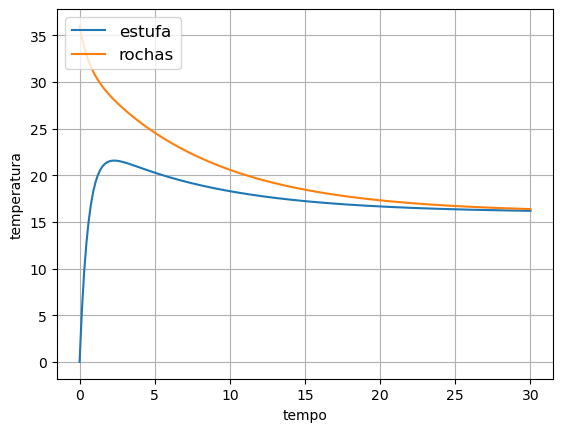

In [65]:
# aumentando o tamanho do gráfico plotado
#plt.rcParams['figure.figsize'] = [12, 6]

dom = np.linspace(0, 30, 200)
plt.plot(dom, 8*np.exp(-dom/8) - 24*np.exp(-7*dom/4) + 16, label='estufa')
plt.plot(dom, 16*np.exp(-dom/8) + 4*np.exp(-7*dom/4) + 16, label='rochas')
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('tempo')
plt.ylabel('temperatura')
plt.grid()
plt.show()

# Campos de vetores
<br>

A função vetorial $\textbf{u}(t)={u_1(t) \choose u_2(t)}$ é chamada **vetor de estado** do sistema. 

Em vez de plotar cada gráfico de $u_1, u_2$ separadamente, como feito acima, para cada instante $t$ podemos **plotar o vetor $\textbf{u}(t)$ através de suas coordenadas $(u_1(t), u_2(t))$**. 

O plano $u_1u_2$ é chamado **plano de fase** e a equação diferencial

$$
{u_1' \choose u_2'} = {-\frac{13}{8}u_1 + \frac34 u_2 + 14 \choose \frac{1}{4}u_1 - \frac14 u_2}
$$

nos ensina como associar a cada vetor ${u_1 \choose u_2}$ um segundo vetor ${u_1' \choose u_2'}$ que representa a taxa de variação nesse ponto. 

Construímos assim um **campo de vetores** associado a essa equação diferencial. 

<br><br>

Vamos estudar a equação diferencial acima, no retângulo dado por 

$$x\in[19, 23],\quad y\in[26, 31].$$ 

Para plotar seu gráfico, começamos construindo uma malha de pontos nesse retângulo.

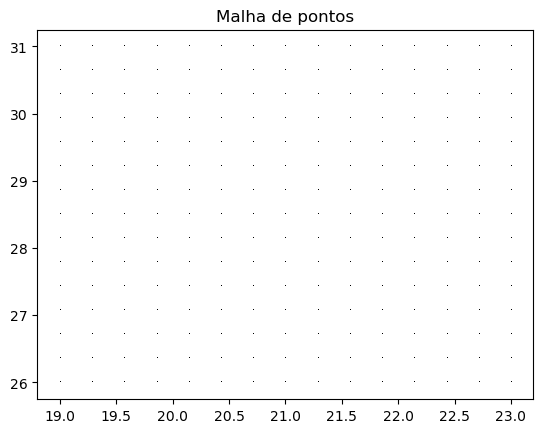

In [66]:
# comente cada linha abaixo, explicando o que ela faz

x_inic, x_final = 19, 23   
y_inic, y_final = 26, 31    

nx = 15    
ny = 15    


x_ponto = np.linspace(x_inic, x_final, nx)
y_ponto = np.linspace(y_inic, y_final, ny)


x_malha, y_malha = np.meshgrid(x_ponto, y_ponto)    

plt.plot(x_malha, y_malha, 'k,')
plt.title('Malha de pontos')
plt.show()

In [67]:
def f(u1, u2):
    return [-(13/8)*u1 + (3/4)*u2 + 14, u1/4 - u2/4]

x_vetor = np.zeros(x_malha.shape)   # complete
y_vetor = np.zeros(y_malha.shape)   # complete

for i in range(ny):
    for j in range(nx):
        x = x_malha[i, j]
        y = y_malha[i, j]
        vet = f(x, y)
        x_vetor[i, j] = vet[0]    # complete
        y_vetor[i, j] = vet[1]


Agora finalmente podemos plotar o campo vetorial utilizando o comando `plt.quiver`.

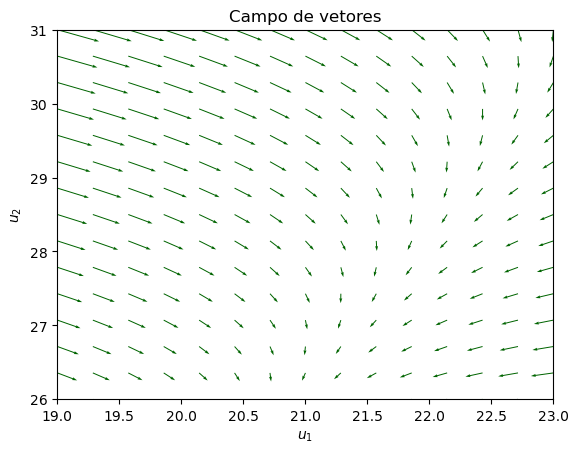

In [68]:
# plotando os pontos e os vetores associados a cada um deles
plt.quiver(x_ponto, y_ponto, x_vetor, y_vetor, color='darkgreen', width=0.002, angles='xy')

plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Campo de vetores')
plt.show()

Outro comando útil para visualizar fluxo de vetores é o `plt.streamplot`.

As **soluções** da equação diferencial são justamente as funções que se encaixam suavemente nesse campo de vetores.

## Trajetórias

Fixemos um vetor de estado inicial, $\textbf{u}(t_0) = {u_1(t_0) \choose u_2(t_0)}$. À medida que $t$ varia, a extremidade de $\textbf{u}(t)$ descreve uma **trajetória** no plano de fase.

Vejamos a trajetória obtida pela solução particular

$$
\textbf{u}_{part}(t) = 8e^{-t/8}{1 \choose 2} -4e^{-7t/4}{6 \choose -1} + {16 \choose 16}
$$

vista acima, associada à condição inicial

$$
\textbf{u}(0) = {0 \choose 36}.
$$

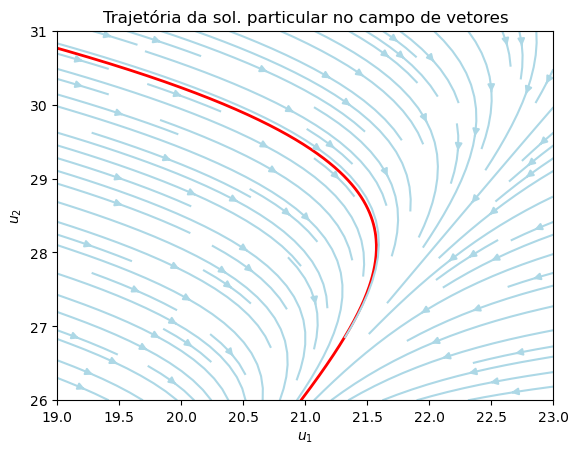

In [69]:
# definindo solução particular
def u_part(t):
    return [8*np.exp(-t/8) - 24*np.exp(-7*t/4) + 16,
            16*np.exp(-t/8) + 4*np.exp(-7*t/4) + 16]

ti = np.linspace(1, 4, 200)
x_part, y_part = u_part(ti)
    
# trajetória
plt.plot(x_part, y_part, '-', color='red', linewidth=2)

# campo de vetores anterior
plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Trajetória da sol. particular no campo de vetores')
plt.show()

Para estudar múltiplas trajetória, podemos utilizar a biblioteca SciPy de computação científica para calcular diferentes soluções da equação diferencial (associadas a diferentes condições iniciais).

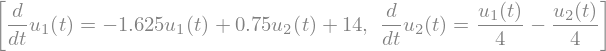

In [70]:
import sympy as sp
sp.init_printing()

t = sp.symbols('t')
u1 = sp.Function('u1')
u2 = sp.Function('u2')
eqs = [sp.Eq(sp.Derivative(u1(t), t), -(13/8)*u1(t) + (3/4)*u2(t) + 14),
       sp.Eq(sp.Derivative(u2(t), t), u1(t)/4 - u2(t)/4)]
eqs

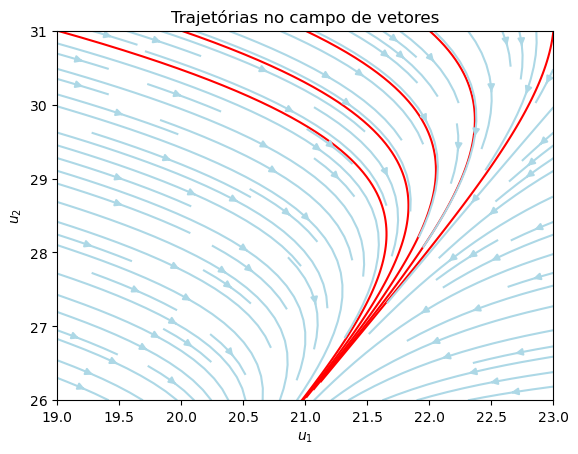

In [71]:
# comente as linhas do código abaixo explicando o que cada uma faz

tspan = np.linspace(0, 3, 100)


for valor_inic in np.linspace(19, 23, 5):
    f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): valor_inic, u2(0): 31})
    uu1 = sp.lambdify(t, f1.rhs)
    uu2 = sp.lambdify(t, f2.rhs)
    plt.plot(uu1(tspan), uu2(tspan), 'r-')

plt.streamplot(x_ponto, y_ponto, x_vetor, y_vetor, color='lightblue')
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.xlim([x_inic, x_final])
plt.ylim([y_inic, y_final])
plt.title('Trajetórias no campo de vetores')
plt.show()

## Exercícios:

1) Plote os campos de vetores, fluxos e trajetórias associados à equação diferencial

$$
\begin{cases}
y_1' = y_1 + y_2 \\
y_2' = 4y_1 + y_2
\end{cases}
$$

no retângulo $x\in[-4,4],\ y\in[-4,4]$.

2) Plote o campo de direções para o sistema abaixo, depois encontre a solução geral  e faça o gráfico de diversas trajetórias no plano de fase.

$$
\begin{cases}
y_1' = -3y_1 + \sqrt{2} y_2 \\
y_2' = \sqrt{2}y_1 + -2y_2
\end{cases}
$$

**Exercícios 1:** (Adaptado de [Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/550/6/11:14%5Bepr%2Cese%5D)) Para cada um dos sistemas homogêneos dados abaixo, verifique se as funções fetoriais $\mathbf{x}^{(1)}$ e  $\mathbf{x}^{(2)}$ são soluções. Em caso afirmativo, verifique que a combinação linear das soluções também é um solução.

a) $\mathbf{x}^{\prime}=\left(\begin{array}{ll}2 & -1 \\ 3 & -2\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{1}{1} e^{-3 t}, x^{(2)}=\binom{1}{3} e^{-t}$
   
b) $\mathbf{x}^{\prime}=\left(\begin{array}{rr}1 & 1 \\ 4 & -2\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{1}{-4} e^{-3 t}, \mathbf{x}^{(2)}=\binom{1}{1} e^{2 t}$

c) $\mathbf{x}^{\prime}=\left(\begin{array}{cc}2 & -5 \\ 1 & -2\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{5 \cos t}{2 \cos t+\operatorname{sn} t}, \mathbf{x}^{(2)}=\binom{5 \operatorname{sen} t}{2 \operatorname{sen} t-\cos t}$

d) $\mathbf{x}^{\prime}=\left(\begin{array}{ll}4 & -2 \\ 8 & -4\end{array}\right) \mathbf{x} ; \mathbf{x}^{(1)}=\binom{2}{4}, \mathbf{x}^{(2)}=\binom{2}{4} t+\binom{0}{1}$

e) $t \mathbf{x}^{\prime}=\left(\begin{array}{ll}2 & -1 \\ 3 & -2\end{array}\right) \mathbf{x}(t>0) ; \mathbf{x}^{(1)}=\binom{1}{1} t, x^{(2)}=\binom{1}{3} t^{-1}$

f) $t \mathbf{x}^{\prime}=\left(\begin{array}{ll}3 & -2 \\ 2 & -2\end{array}\right) \mathbf{x}(t>0) ; \mathbf{x}^{(1)}=\binom{1}{2} t^{-1}, \mathbf{x}^{(2)}=\binom{2}{1} t^2$

## Sistemas lineares homogêneos com coeficientes constantes

Sistemas **lineares homogêneos com coeficientes constantes** têm a forma

$$ \mathbf{x}' = \mathbf{A} \mathbf{x}$$

em que $\mathbf{A} \in \Re^{n\times n}$ é uma matriz e $\textbf{x}=[x_1, x_2,..., x_n]^T$ é um vetor cujas componentes $x_i=x_i(t)$ são funções de $t$.

Soluções tais $\textbf{x} \neq \textbf{0}$ têm a forma 

$$ \textbf{x} =\textbf{v} e^{\lambda t}$$

onde $\textbf{v}$ é um autovetor de $\mathbf{A}$ associado a um autovalor $\lambda$.


### Cálculo de Autovalores e Autovetores

A equação 

$$ \mathbf{A} \mathbf{x} = \mathbf{v}$$ 

pode ser vista como uma transformação linear que leva (ou transforma) um vetor dado $\mathbf{x}$ em um novo vetor $\mathbf{v}$. Se  $\mathbf{v}$ for um múltiplo $\lambda\mathbf{x}$ do vetor $\mathbf{x}$, então, $\mathbf{v}$ é um **autovetor** de $\mathbf{A}$ associado ao **autovalor** $\lambda$ 

Para encontrar os autovalores e autovetores de uma matriz, buscamos as soluções de

$$ \mathbf{A} \mathbf{x} = \lambda \mathbf{x}$$ 

ou

$$ (\mathbf{A} -\lambda \mathbf{I})\mathbf{x} = \mathbf{0} \text{.}$$ 

A última equação terá soluções não nulas se, e somente se, $\lambda$ for escolhido de modo que

$$ \text{det}(\mathbf{A} -\lambda \mathbf{I})= 0 \text{.}$$ 

Essa equação polinomial de grau $n$ em $\lambda$ é a equação característica da matriz $\mathbf{A}$. Os valores de  $\lambda$ que a satisfazem podem ser reais ou complexos e são chamados de autovalores da matriz $\mathbf{A}$. As soluções não nulas obtidas usando tal valor de $\lambda$ são os autovetores correspondentes, ou associados, àquele autovalor.

**Exemplo 2:** Encontre os autovalores e autovetores da matriz
$$
A=\left(\begin{array}{ll}
3 & -1 \\
4 & -2
\end{array} \right)\text{.}
$$

In [30]:
lamb, x1, x2 = sp.symbols('lambda x_1 x_2')
A = Matrix([[3,-1],[4,-2]])
I = Matrix([[1,0],[0,1]])

In [31]:
eq = sp.Eq((A-lamb*I).det(), 0)
display(eq)

In [32]:
r = sp.solve(eq)
r

Os autovalores da matriz são $\lambda_1=-1$ e $\lambda_2 = 2$.

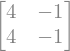

In [33]:
(A-r[0]*I)

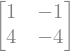

In [34]:
(A-r[1]*I)

Resolvendo o sistema $(\mathbf{A} -\lambda_1 \mathbf{I})\mathbf{x} = \mathbf{0}$ obtemos que $x_1=x_2/4$, e para $\lambda_2$ obtemos $x_1=x_2$ como é mostrado abaixo. 

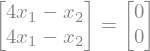

In [35]:
sp.Eq((A-r[0]*I)*Matrix([[x1],[x2]]), Matrix([[0],[0]]))

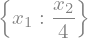

In [36]:
sp.solve([4*x1-x2, 4*x1-x2],[x1,x2])

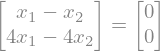

In [37]:
sp.Eq((A-r[1]*I)*Matrix([[x1],[x2]]), Matrix([[0],[0]]))

In [38]:
sp.solve([x1-x2,x1-x2],[x1,x2])

Assim temos os autovetores $\mathbf{v}_1 = (1,\frac{1}{4})$ e $\mathbf{v}_2=(1,1)$ (e seus múltiplos) associados aos autovalores $\lambda_1$ e $\lambda_2$. 

Usando SymPy também podemos faer simplesmente:

In [39]:
A.eigenvals()

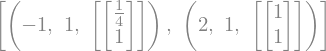

In [40]:
A.eigenvects()

**Exemplo 3:** Encontre a equação característica e os autovalores e autovetores da matriz

$$
A=\left(\begin{array}{lll}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}\right)
$$

In [41]:
lamb, x1, x2, x3 = sp.symbols('lambda x_1 x_2 x_3')
A = Matrix([[0,1,1],[1,0,1],[1,1,0]])
I = sp.eye(3)

eq = sp.Eq((A-lamb*I).det(), 0)
display(eq)

In [42]:
r = sp.solve(eq)
r

Apenas dois atovalores distintos. Fatorando a equação notamos que $\lambda_1=-1$ tem multiplicidade algébrica $m=2$. 

In [43]:
sp.factor(eq.lhs)

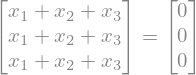

In [44]:
sp.Eq((A-r[0]*I)*Matrix([x1,x2,x3]), Matrix([0,0,0]))

In [45]:
M = (A-r[1]*I)
x = Matrix([x1,x2,x3])

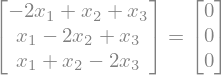

In [46]:
sp.Eq(M*x, Matrix([0,0,0]))

In [47]:
sp.solve(M*x,x)

In [48]:
M = (A-r[0]*I)
sp.solve(M*x,x)

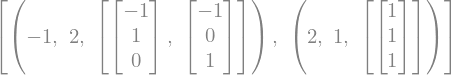

In [49]:
A.eigenvects()

Vamos agora concentrar nossa atenção em sistemas de duas equações diferenciais e focar nos sistemas mais simples, com equações lineares de primeira ordem com coeficientes constantes. Queremos estudar que tipo de soluções tais sistemas podem ter e como as soluções podem ser determinadas e apresentadas graficamente.

### Sistemas de EDOs lineares homogêneas com coeficientes constantes

Sistemas de EDOs lineares homogêneas com coeficientes constantes têm a forma

$$
\mathbf{x}^{\prime}=\mathbf{A}\mathbf{x}
$$

em que $\mathbf{A}$ é uma matriz constante $n \times n$. O caso $n = 2$ é particularmente importante e permite a visualização no plano $x_1x_2$, chamado o **plano de fase**. Calculando $\mathbf{Ax}$ em um grande número de pontos e fazendo o gráfico dos vetores resultantes, obtemos um campo de direções de vetores tangentes a soluções do sistema de equações diferenciais. O gráfico contendo algumas trajetórias representativas das soluções é chamado um **retrato de fase**.


As soluções desse sistema têm a forma 

$$ \textbf{x} =\textbf{v} e^{\lambda t}$$

onde $\textbf{v}$ é um autovetor de $A$ associado a um autovalor $\lambda$

**Exemplo 4:** Considere o sistema

$$\mathbf{x}^{\prime}=\left(\begin{array}{ll}
3 & -2 \\ 
2 & -2
\end{array}\right) \mathbf{x} \text{.}$$

Vamos fazer um gráfico de algumas soluções $x_1(t)$ e $x_2(t)$ e analisar o comportamento qualitativo das soluções. 

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
A = np.array([[3,-2],[2,-2]])
lamb,v = np.linalg.eig(A)
print(lamb)

[ 2. -1.]


In [52]:
print(v/v[0,1])

[[2. 1.]
 [1. 2.]]


As soluções são 
$$
\mathbf{x}^{(1)}(t)=\binom{2}{1} e^{2 t} \quad \text{e} \quad 
\mathbf{x}^{(2)}(t)=\binom{1}{2} e^{-t}
$$

As soluções $x^{(1)}$ e $x^{(2)}$ formam um conjunto fundamental de soluções, e a solução geral do sistema é

$$\mathbf{x} =c_1 \mathbf{x}^{(1)}(t)+c_2 \mathbf{x}^{(2)}(t) =c_1\binom{2}{1} e^{2 t}+c_2\binom{1}{2} e^{-t}
$$

ou ainda 

$$\mathbf{x}_1 =2c_1 e^{2 t} + c_2 e^{-t} \quad \text{e} \quad  \mathbf{x}_2 =c_1 e^{2 t} + 2 c_2 e^{-t}
$$

Vamos analisar graficamente:

In [53]:
x1 = lambda t,c1,c2:  c1*v[0,0]*np.exp(lamb[0]*t) + c2*v[0,1]*np.exp(lamb[1]*t)
x2 = lambda t,c1,c2:  c1*v[1,0]*np.exp(lamb[0]*t) + c2*v[1,1]*np.exp(lamb[1]*t)

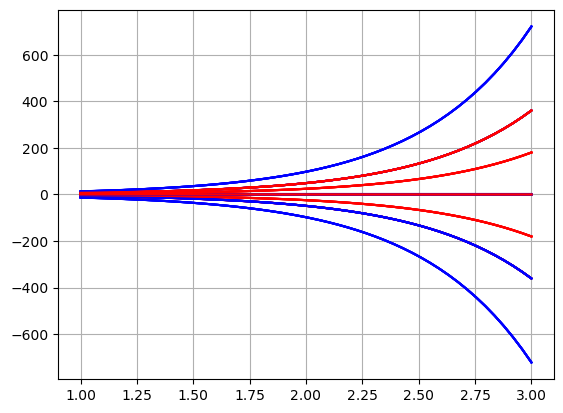

In [54]:
fig, ax = plt.subplots()

ti = np.linspace(1,3)
for c1 in [-2,-1,0,1,2]:  
    for c2 in [-2,-1,0,1,2]:
        ax.plot(ti, x1(ti,c1,c2),'b')
        ax.plot(ti, x2(ti,c1,c2),'r')
plt.grid()

**Exemplo 5:** Considere o sistema

$$\mathbf{x}^{\prime}=\left(\begin{array}{ll}
1 & -2 \\ 
3 & -4
\end{array}\right) \mathbf{x} \text{.}$$

Vamos fazer um gráfico de algumas soluções $x_1(t)$ e $x_2(t)$ e analisar o comportamento qualitativo das soluções. 

In [55]:
A = np.array([[1,-2],[3,-4]])
lamb,v = np.linalg.eig(A)
print(lamb)

[-1. -2.]


In [56]:
v/v[0,1]

array([[1.27475488, 1.        ],
       [1.27475488, 1.5       ]])

In [57]:
x1 = lambda t,c1,c2:  c1*v[0,0]*np.exp(lamb[0]*t) + c2*v[0,1]*np.exp(lamb[1]*t)
x2 = lambda t,c1,c2:  c1*v[1,0]*np.exp(lamb[0]*t) + c2*v[1,1]*np.exp(lamb[1]*t)

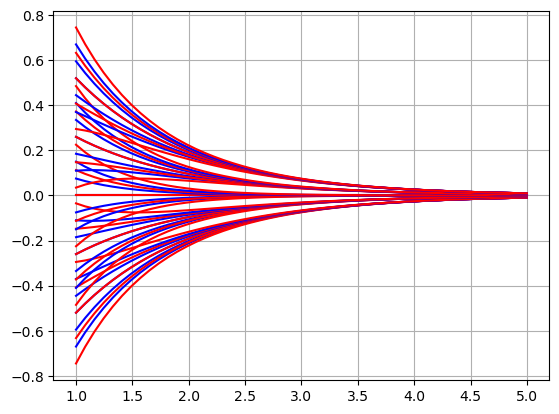

In [58]:
fig, ax = plt.subplots()

ti = np.linspace(1,5)
for c1 in [-2,-1,0,1,2]:  
    for c2 in [-2,-1,0,1,2]:
        ax.plot(ti, x1(ti,c1,c2),'b')
        ax.plot(ti, x2(ti,c1,c2),'r')
plt.grid()

**Exemplo 6:** Considere o sistema

$$\mathbf{x}^{\prime}=\left(\begin{array}{ll}
-\frac{1}{2} & 1 \\ 
-1 & -\frac{1}{2}
\end{array}\right) \mathbf{x} \text{.}$$

Vamos fazer um gráfico de algumas soluções $x_1(t)$ e $x_2(t)$ e analisar o comportamento qualitativo das soluções. 

In [59]:
A = np.array([[-1/2,1],[-1,-1/2]])
lamb,v = np.linalg.eig(A)
print(lamb)

[-0.5+1.j -0.5-1.j]


Nesse caso os autovalores são imaginários $\lambda \pm \mu i$. Escrevendo a solução como $\mathbf{x}(t)=\mathbf{u}(t)+i \mathbf{v}(t)$, então os vetores
$$
\begin{aligned}
& \mathbf{u}(t)=e^{\lambda t}(a \cos (\mu t)-b \operatorname{sen}(\mu t)) \\
& \mathbf{v}(t)=e^{\lambda t}(a \operatorname{sen}(\mu t)+b \cos (\mu t))
\end{aligned},
$$
com $a$ e$b$ reais, serão as soluções reais procuradas.


In [60]:
u = lambda t,a,b:  np.exp(-0.5*t)*(a*np.cos(t) - b*np.sin(t))
v = lambda t,a,b:  np.exp(-0.5*t)*(a*np.cos(t) + b*np.sin(t))

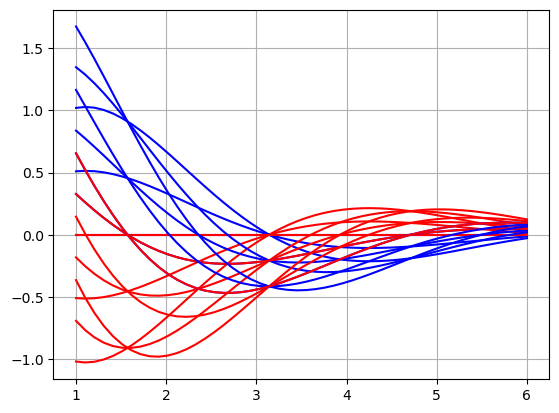

In [61]:
fig, ax = plt.subplots()

ti = np.linspace(1,6)
for a in [0,1,2]:  
    for b in [-2,-1,0]:
        ax.plot(ti, u(ti,a,b),'b')
        ax.plot(ti, v(ti,a,b),'r')
plt.grid()

, usando a função `dsolve`para obter as soluções:

In [62]:
t, a, b = sp.symbols('t a b')

x1 = sp.Function('x1')
x2 = sp.Function('x2')

eqs = [sp.Eq(sp.Derivative(x1(t), t), -0.5*x1(t)+x2(t)),
       sp.Eq(sp.Derivative(x2(t), t),  -x1(t)-0.5*x2(t))]
       
sol = sp.dsolve(eqs, [x1(t), x2(t)], ics={x1(0): a, x2(0): b})
sol

**Exercício 2:** Expresse a solução geral do sistema de equações dado em termos de funções reais e descreva o comportamento das soluções quando t → ∞.

(a) $\quad \mathbf{x}^{\prime}=\left(\begin{array}{rr}-1 & -4 \\ 1 & -1\end{array}\right) \mathbf{x}$ 

(b) $\quad \mathbf{x}^{\prime}=\left(\begin{array}{ll}2 & -5 \\ 1 & -2\end{array}\right) x$

(c) $\quad \mathbf{x}^{\prime}=\left(\begin{array}{ll}1 & -1 \\ 5 & -3\end{array}\right) x$

(d) $\quad \mathbf{x}^{\prime}=\left(\begin{array}{rr}1 & 2 \\ -5 & -1\end{array}\right) x$


**Exercício 3:** Expresse a solução geral do sistema de equações dado em termos de funções reais.

(a) $\quad x^{\prime}=\left(\begin{array}{rrr}
1 & 0 & 0 \\
2 & 1 & -2 \\
3 & 2 & 1
\end{array}\right) \mathbf{x}$


(b) $\quad x^{\prime}=\left(\begin{array}{rrr}
-3 & 0 & 2 \\
1 & -1 & 0 \\
-2 & -1 & 0
\end{array}\right) \mathbf{x}$

**Exercício 4:** Em cada um dos Problemas, encontre a solução do problema de valor inicial dado. Descreva o comportamento da solução quando t − ∞.

(a) $\quad \mathbf{x}^{\prime}=\left(\begin{array}{ll}
1 & -5 \\
1 & -3
\end{array}\right) \mathbf{x}, \quad
\mathbf{x}(0)=\binom{1}{1}$

(b) $\quad \mathbf{x}^{\prime}=\left(\begin{array}{rr}
-3 & 2 \\
-1 & -1
\end{array}\right) \mathbf{x}, \quad
\mathbf{x}(0)=\binom{1}{-2}$

Um exemplo final.

**Exemplo 7:** (Adaptado de [Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/706/17:34%5Bser%2C%C3%A3o%5D)) Um sistema com duas massas e três molas ilustrado como o da Figura 1
sem ação das forças externas, ou seja, $F_1(t) = 0$ e $F_2(t)= 0$, tem as seguintes equações governantes

$$
\begin{aligned}
& m_1 \frac{d^2 x_1}{d t^2}=-\left(k_1+k_2\right) x_1+k_2 x_2 \\
& m_2 \frac{d^2 x_2}{d t^2}=k_2 x_1-\left(k_2+k_3\right) x_2
\end{aligned}
$$

Essas equações podem ser resolvidas transformando-as em um sistema de quatro equações de primeira ordem, fazendo
$y_1=x_1, y_2=x_2, y_3=x_1{ }^{\prime}$ e $y_4=x_2{ }^{\prime}$. Então,

$$
\begin{aligned}
& y_1^{\prime}=y_3, \\
& y_2^{\prime}=y_4, \\
& m_1 y_3^{\prime}=-\left(k_1+k_2\right) y_1+k_2 y_2, \\
& m_2 y_4^{\prime}=k_2 y_1-\left(k_2+k_3\right) y_2 .
\end{aligned}
$$

Suponha que $m_1 = 2$, $m_2 = 9/4$, $k_1 = 1$, $k_2 = 3$ e $k_3 = 15/4$, então as equações ficam:

$$
y_1^{\prime}=y_3, \quad y_2^{\prime}=y_4, \quad y_3^{\prime}=-2 y_1+\frac{3}{2} y_2, \quad y_4^{\prime}=\frac{4}{3} y_1-3 y_2 .
$$

Podemos escrever o sistema em forma matricial como

$$
\mathbf{y}^{\prime}=\left(\begin{array}{cccc}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-2 & \frac{3}{2} & 0 & 0 \\
\frac{4}{3} & -3 & 0 & 0
\end{array}\right) \mathrm{y}=\mathrm{Ay}
$$

As funções $y_1$ e $y_2$ são as posições das duas massas em relação às suas posições de equilíbrio, e as funções $y_3$ e $y_4$ são suas velocidades. Para obter as soluções, precisamos calcular os autovalores da matriz $\mathbf{A}$ cuja equação caravterística é 
$$
\lambda^4+5 \lambda^2+4=\left(\lambda^2+1\right)\left(\lambda^2+4\right).
$$


Vamos analisaros movimentos possíveis e desenhar gráficos mostrando comportamentos típicos sabendo que a solução geral é 
$$
\mathbf{y}=c_1\left(\begin{array}{r}
3 \cos t \\
2 \cos t \\
-3 \operatorname{sen} t \\
-2 \operatorname{sen} t
\end{array}\right)+c_2\left(\begin{array}{l}
3 \operatorname{sen} t \\
2 \operatorname{sen} t \\
3 \cos t \\
2 \cos t
\end{array}\right)+c_3\left(\begin{array}{r}
3 \cos (2 t) \\
-4 \cos (2 t) \\
-6 \operatorname{sen}(2 t) \\
8 \operatorname{sen}(2 t)
\end{array}\right)+c_4\left(\begin{array}{r}
3 \operatorname{sen}(2 t) \\
-4 \operatorname{sen}(2 t) \\
6 \cos (2 t) \\
-8 \cos (2 t)
\end{array}\right)
$$

In [63]:
y1 = lambda t,c1,c2,c3,c4:  c1*3*np.cos(t)+c2*3*np.sin(t)+c3*np.cos(2*t)+c4*3*np.sin(2*t)


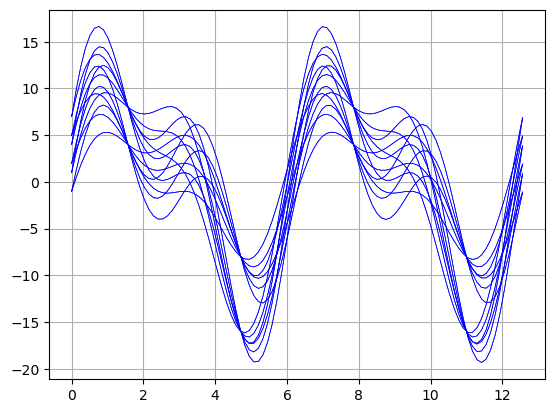

In [64]:
fig, ax = plt.subplots()
ti = np.linspace(0,2*6.28,100)
for c1 in [-1,0,1]:  
    for c2 in [2,4]:
        for c3 in [1,2]:
            for c4 in [1,2]:
                ax.plot(ti, y1(ti,c1,c2,c2,c3),'b', lw=0.5)

plt.grid()

### Referências

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. São Paulo: Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 10 jun. 2024.

BRANNAN, James R.; BOYCE, William E. Equações Diferenciais uma Introdução a Métodos Modernos e suas Aplicações. São Paulo: Grupo GEN, 2008. E-book. ISBN 978-85-216-2337-3. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/978-85-216-2337-3/. Acesso em: 01 jun. 2023.